## Importing Required Libraries

In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.datasets import mnist

## Loading Data 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Images:", len(X_train))
print("Testing Images:", len(X_test))
print("Shape:", X_train[0].shape)

11490434/11490434 [==============================] - 1s 0us/step
Training Images: 60000
Testing Images: 10000
Shape: (28, 28)


## Data Preprocessing

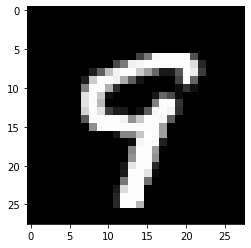

In [3]:
import random
import matplotlib.pyplot as plt
random_image = random.choice(X_train)
plt.imshow(random_image, cmap="gray")

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape

X_train = X_train / 255.
X_test = X_test / 255.


X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

input_shape = X_train[0].shape

## Building a Model

In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

## Compile the Model

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## Fit the Model

In [7]:
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1983 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0788 - accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0540 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0435 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0322 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0257 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0191 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 26s 14m

## Evaluate and predict the model

1/1 [==============================] - 0s 70ms/step
2


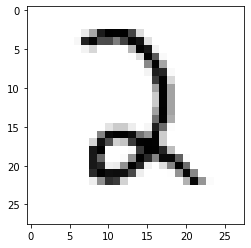

In [8]:
# network evaluation
model.evaluate(X_test, y_test)

# test sample data
image_index = 980
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())